## Machine Learning Lab Experiment - 2
A1 to A3

In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg

filePath = "/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx"
df1 = pd.read_excel(file_path, sheet_name="Purchase data")

A = df1[["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]].values
C = df1[["Payment (Rs)"]].values


dimA = print('dimensionality of vector space is', A.shape)
vecA = print('vectors exist in this vector space is',A.shape[1])
rankA = print("rank of matrix A is :",linalg.matrix_rank(A))
pseudoinvA = np.linalg.pinv(A)
X = np.dot(pseudoinvA, C)
print("Cost of Candies:", X[0])
print("Cost of Mangoes:", X[1])
print("Cost of Milk Packets:", X[2])
print("\n")
print("model vector X is:",X)
print("\n")
df1["Category"] = np.where(df1["Payment (Rs)"] > 200, "RICH", "POOR")
print(df1[["Customer","Payment (Rs)","Category"]])


dimensionality of vector space is (10, 3)
vectors exist in this vector space is 3
rank of matrix A is : 3
Cost of Candies: [1.]
Cost of Mangoes: [55.]
Cost of Milk Packets: [18.]


model vector X is: [[ 1.]
 [55.]
 [18.]]


  Customer  Payment (Rs) Category
0      C_1           386     RICH
1      C_2           289     RICH
2      C_3           393     RICH
3      C_4           110     POOR
4      C_5           280     RICH
5      C_6           167     POOR
6      C_7           271     RICH
7      C_8           274     RICH
8      C_9           148     POOR
9     C_10           198     POOR


A4:

mean of price 1560.663453815261
variance in prices are: 58732.365352539186
mean price on wednesdays are 1550.706
mean population price is  1560.663453815261
mean price on april are 1698.9526315789474
mean population price is  1560.663453815261
probability of making a loss over the stock is  0.4979919678714859
probability of making profit on wednesday 0.08433734939759036
probability of making profit given it is wednesday 0.42


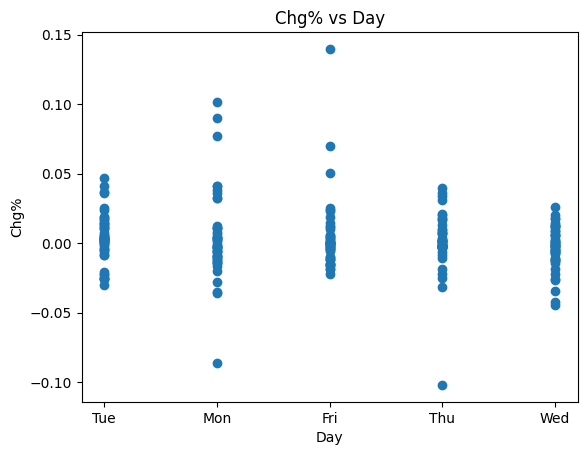

In [ ]:
import statistics
import matplotlib.pyplot as plt
import pandas as pd
filePath = "drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx"
df2 = pd.read_excel(filePath, sheetName="IRCTC Stock Price")

prices = df2.iloc[:, 3]
meanPrice = print("mean of price",statistics.mean(prices))
varPrice = print("variance in prices are:",statistics.variance(prices))

pricesOnWed = df2[df2.iloc[:, 2] == "Wed"].iloc[:, 3]
meanWed = statistics.mean(pricesOnWed) if not priceOnWed.empty else None
print("mean price on wednesdays are",meanWed)
populationPrice = df2.iloc[:, 3]
populationMean = statistics.mean(populationPrice)
print("mean population price is ", populationMean)

pricesOnApr = df2[df2.iloc[:, 1] == "Apr"].iloc[:, 3]
meanApr = statistics.mean(pricesOnApr) if not pricesOnApr.empty else None
print("mean price on april are",meanApr)
print("mean population price is ", populationMean)

chg = df2.iloc[:, 8]
chgLoss=df2[chg.apply(lambda x: x<0)]
print("probability of making a loss over the stock is ",len(chgLoss)/len(chg))


profitOnWed=df2[(df2.iloc[:, 2] == "Wed") & (df2.iloc[:, 8] > 0)]
print("probability of making profit on wednesday",len(profitOnWed)/len(chg))

numWed=len(df2[df2.iloc[:, 2] == "Wed"])
print("probability of making profit given it is wednesday",len(profitOnWed)/numWed)

plt.figure.figsize=(12, 8)
plt.scatter(df2.iloc[:, 2], chg)
plt.xlabel("Day")
plt.ylabel("Chg%")
plt.title("Chg% vs Day")
plt.show()

A5 to A(10):

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

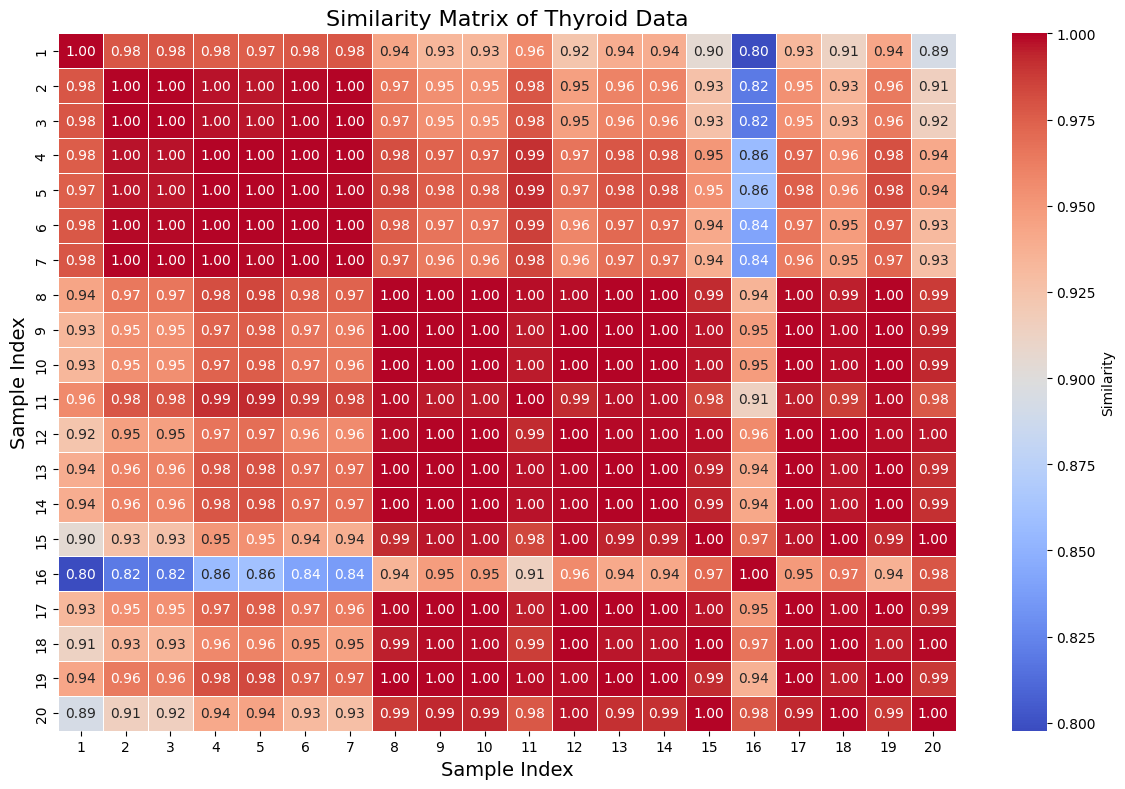

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filePath = "drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx"
thyroidData = pd.read_excel(filePath, sheet_name="thyroid0387_UCI")

numericCols = thyroidData.select_dtypes(include=[np.number]).columns
categoricalCols = thyroidData.select_dtypes(exclude=[np.number]).columns
print(thyroidData.dtypes)
print(thyroidData.describe())

thyroidData[numericCols] = thyroidData[numericCols].apply(
    lambda x: x.fillna(x.median() if ((x - x.mean()).abs() > 3 * x.std()).sum() > 0 else x.mean())
)
thyroidData[categoricalCols] = thyroidData[categoricalCols].apply(lambda x: x.fillna(x.mode()[0]))

print(thyroidData.isnull().sum())

scaler = MinMaxScaler()
thyroidData[numericCols] = scaler.fit_transform(thyroidData[numericCols])

print(thyroidData.head())

vec1 = thyroidData.iloc[0, :].astype(bool)
vec2 = thyroidData.iloc[1, :].astype(bool)

f11 = sum(vec1 & vec2)
f00 = sum(~vec1 & ~vec2)
f01 = sum(~vec1 & vec2)
f10 = sum(vec1 & ~vec2)
print("\n")
JC = f11 / (f01 + f10 + f11)
SMC = (f11 + f00) / (f00 + f01 + f10 + f11)

print("Jaccard Similarity:", JC)
print("Simple Matching Coefficient:", SMC)

vec1Full = thyroidData.loc[0, numericCols].values.astype(np.float64)
vec2Full = thyroidData.loc[1, numericCols].values.astype(np.float64)

cosineSim = np.dot(vec1Full, vec2Full) / (np.linalg.norm(vec1Full) * np.linalg.norm(vec2Full))
print("Cosine Similarity:", cosineSim)

simMatrix = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        v1 = thyroidData.iloc[i, :].astype(bool)
        v2 = thyroidData.iloc[j, :].astype(bool)
        f11 = sum(v1 & v2)
        f00 = sum(~v1 & ~v2)
        f01 = sum(~v1 & v2)
        f10 = sum(v1 & ~v2)
        JC = f11 / (f01 + f10 + f11)
        SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
        cosineSim = np.dot(thyroidData.loc[i, numericCols].values.astype(np.float64), thyroidData.loc[j, numericCols].values.astype(np.float64)) / \
                    (np.linalg.norm(thyroidData.loc[i, numericCols].values.astype(np.float64)) * np.linalg.norm(thyroidData.loc[j, numericCols].values.astype(np.float64)))
        simMatrix[i, j] = (JC + SMC + cosineSim) / 3

plt.figure(figsize=(12, 8))
sns.heatmap(simMatrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Similarity'},
            xticklabels=range(1, 21), yticklabels=range(1, 21), linewidths=0.5)

plt.title('Similarity Matrix of Thyroid Data', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Sample Index', fontsize=14)

plt.tight_layout()
plt.show()